In [82]:
import pandas as pd
import numpy as np

In [83]:
df=pd.read_csv("/content/election_results_2024.csv")

In [84]:
df.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


In [85]:
df.shape

(543, 8)

As we can see there are 543 constituency in india for lok sabha .. and we have 543 rows

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [87]:
df.isna().sum()

,0
Constituency,0
Const. No.,0
Leading Candidate,0
Leading Party,0
Trailing Candidate,1
Trailing Party,1
Margin,0
Status,0


We have only 1 row with  na value in the entire dataframe


In [88]:
# check which row is it ....
df[ df['Trailing Candidate'].isna() ]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [89]:
df.loc[493 , 'Margin'] = 0

We have only one constituency where status is not declared i.e SURAT

convert MArgin col into int first

In [90]:
df['Margin']=df['Margin'].astype(int)

In [91]:
pd.set_option('display.max_rows', None)

In [92]:
df['Margin'] = df['Margin'].astype(int)

we can see that Bharatiya Janata Party	is leading in india by all over 46081536 votes

In [93]:
df.groupby("Leading Party")['Constituency'].count().sort_values(ascending = False).head(5)

,Constituency
Leading Party,
Bharatiya Janata Party,240
Indian National Congress,99
Samajwadi Party,37
All India Trinamool Congress,29
Dravida Munnetra Kazhagam,22


<Axes: xlabel='Leading Party'>

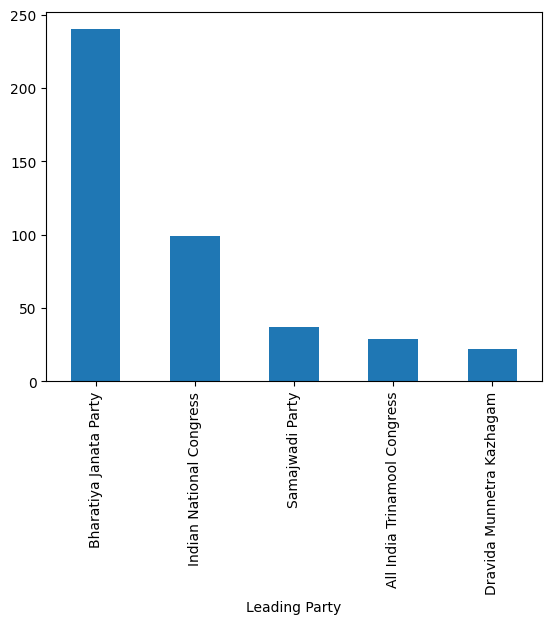

In [94]:
df.groupby("Leading Party")['Constituency'].count().sort_values(ascending = False).head(5).plot(kind='bar')

clearly can see BJP has won 240 seats whereas congress has won  99 seats  , samajwadi party 37 , trinmool congress  - 29 ...

BJP needs around 270 votes to make govt. lets see with whom bjp will make an alliance

Lets check about famous politicians stats

In [95]:
modi =  df[ df['Leading Candidate'] == 'NARENDRA MODI' ]
rahul_gandhi = df[ df['Leading Candidate'] == 'RAHUL GANDHI']
amit_shah = df[ df['Leading Candidate'] == 'AMIT SHAH']

In [96]:
modi

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,Result Declared


modi winning from varanasi with 152513 votes defeating congress candidate AJAY RAI

In [97]:
rahul_gandhi

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared


rahul gandhi winning from rae bareli and wayanad as well defeating BJP by 390030 votes and CPI by 364422 votes

In [98]:
amit_shah

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared


amit shah winning from Gandhinagar by 744716 votes defeating congress's candidate ramanbhai patel

lets get a  list of top 10 leading candidates

In [99]:
top_10_lead = df.sort_values( by = 'Margin' , ascending = False ).head(10)

In [100]:
top_10_lead

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared
159,Diamond harbour,21,ABHISHEK BANERJEE,All India Trinamool Congress,ABHIJIT DAS (BOBBY),Bharatiya Janata Party,710930,Result Declared
513,Tripura West,1,BIPLAB KUMAR DEB,Bharatiya Janata Party,ASISH KUMAR SAHA,Indian National Congress,611578,Result Declared
529,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,Result Declared
422,RAIPUR,8,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,VIKAS UPADHYAY,Indian National Congress,575285,Result Declared
503,TIRUVALLUR,1,Sasikanth Senthil,Indian National Congress,"Balaganapathy, V. Pon",Bharatiya Janata Party,572155,Result Declared


<ipython-input-101-68eba7ff75a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_lead['Leading Candidate'] , y = top_10_lead['Margin'] , palette='viridis')


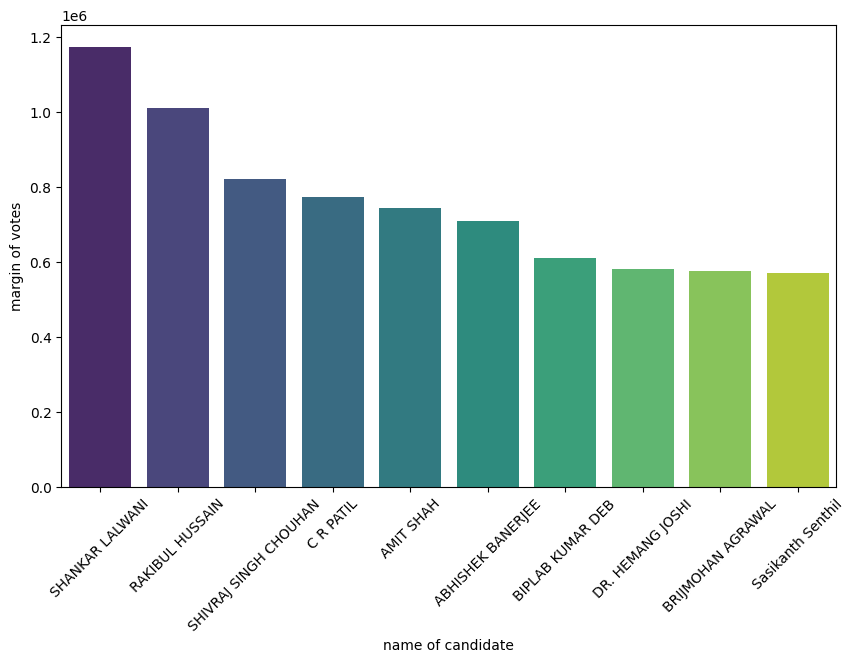

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.barplot(x = top_10_lead['Leading Candidate'] , y = top_10_lead['Margin'] , palette='viridis')
plt.xlabel('name of candidate')
plt.ylabel('margin of votes')
plt.xticks(rotation = 45)
plt.show()

In [102]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [103]:
trail_top_10 = df.sort_values( by = 'Margin' , ascending = False ).head(10)

In [104]:
trail_top_10

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared
159,Diamond harbour,21,ABHISHEK BANERJEE,All India Trinamool Congress,ABHIJIT DAS (BOBBY),Bharatiya Janata Party,710930,Result Declared
513,Tripura West,1,BIPLAB KUMAR DEB,Bharatiya Janata Party,ASISH KUMAR SAHA,Indian National Congress,611578,Result Declared
529,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,Result Declared
422,RAIPUR,8,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,VIKAS UPADHYAY,Indian National Congress,575285,Result Declared
503,TIRUVALLUR,1,Sasikanth Senthil,Indian National Congress,"Balaganapathy, V. Pon",Bharatiya Janata Party,572155,Result Declared


<ipython-input-107-106612c4d41d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = trail_top_10['Trailing Candidate'], y = trail_top_10['Margin'] , palette='viridis')


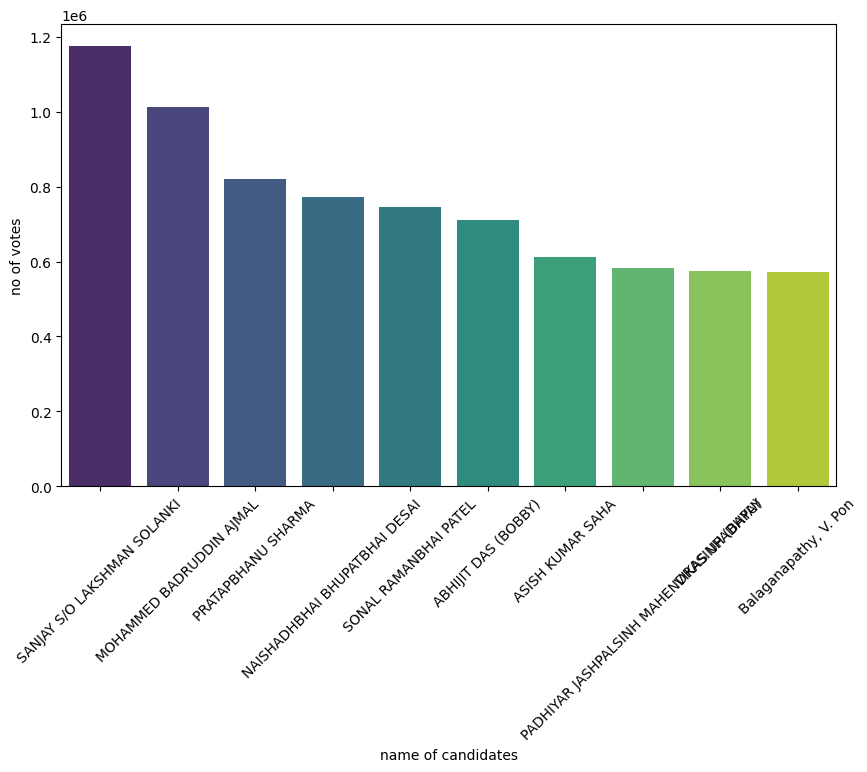

In [107]:
# lets plot a graph for maximum trail

plt.figure(figsize=(10,6))
sns.barplot(x = trail_top_10['Trailing Candidate'], y = trail_top_10['Margin'] , palette='viridis')
plt.xlabel('name of candidates')
plt.ylabel('no of votes')
plt.xticks(rotation = 45)
plt.show()